<a href="https://colab.research.google.com/github/ToriStoner/ToriStoner/blob/main/ASL_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

In [19]:
test_annotations = pd.read_csv("test_annotations.csv")

In [20]:
test_annotations.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,J9_jpg.rf.213a9e356777a13d336e4988c33a93e1.jpg,416,416,J,88,128,194,251
1,Q7_jpg.rf.07fdf6c096cd2a9be72b4de4a627935d.jpg,416,416,Q,37,153,326,309
2,Z16_jpg.rf.309328aaeb31736f8a93a570d6d4f140.jpg,416,416,Z,49,252,216,368
3,R5_jpg.rf.1e94c77f430ee342744dc9fce202c449.jpg,416,416,R,132,96,386,415
4,Z18_jpg.rf.2cffbd9beaeb50a7d03751c3ce738e81.jpg,416,416,Z,122,227,250,313


In [21]:
train_annotations = pd.read_csv("train_annotations.csv")

In [22]:
train_annotations.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg,390,390,U,38,69,347,389
1,P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg,372,372,P,84,203,330,332
2,K4_jpg.rf.00821732715c9137b8060360770ea1d8.jpg,372,372,K,42,12,351,369
3,W6_jpg.rf.00d19bc3a49f6469e2afa3aa92f14ff4.jpg,412,412,W,22,73,377,412
4,J30_jpg.rf.00d20e595026b31773ded47509545471.jpg,382,382,J,122,204,250,334


In [23]:
combined_annotations = pd.concat([train_annotations, test_annotations])


In [24]:
combined_annotations.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg,390,390,U,38,69,347,389
1,P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg,372,372,P,84,203,330,332
2,K4_jpg.rf.00821732715c9137b8060360770ea1d8.jpg,372,372,K,42,12,351,369
3,W6_jpg.rf.00d19bc3a49f6469e2afa3aa92f14ff4.jpg,412,412,W,22,73,377,412
4,J30_jpg.rf.00d20e595026b31773ded47509545471.jpg,382,382,J,122,204,250,334


In [25]:
combined_annotations.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,U7_jpg.rf.0037faea78f8a89329a93006132921b3.jpg,390,390,U,38,69,347,389
1,P12_jpg.rf.0046c1c30abbbccd31716c5b2ad835b9.jpg,372,372,P,84,203,330,332
2,K4_jpg.rf.00821732715c9137b8060360770ea1d8.jpg,372,372,K,42,12,351,369
3,W6_jpg.rf.00d19bc3a49f6469e2afa3aa92f14ff4.jpg,412,412,W,22,73,377,412
4,J30_jpg.rf.00d20e595026b31773ded47509545471.jpg,382,382,J,122,204,250,334


<ipython-input-13-219b009c872b>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', num_classes)  # Choose a colormap (e.g., 'viridis')


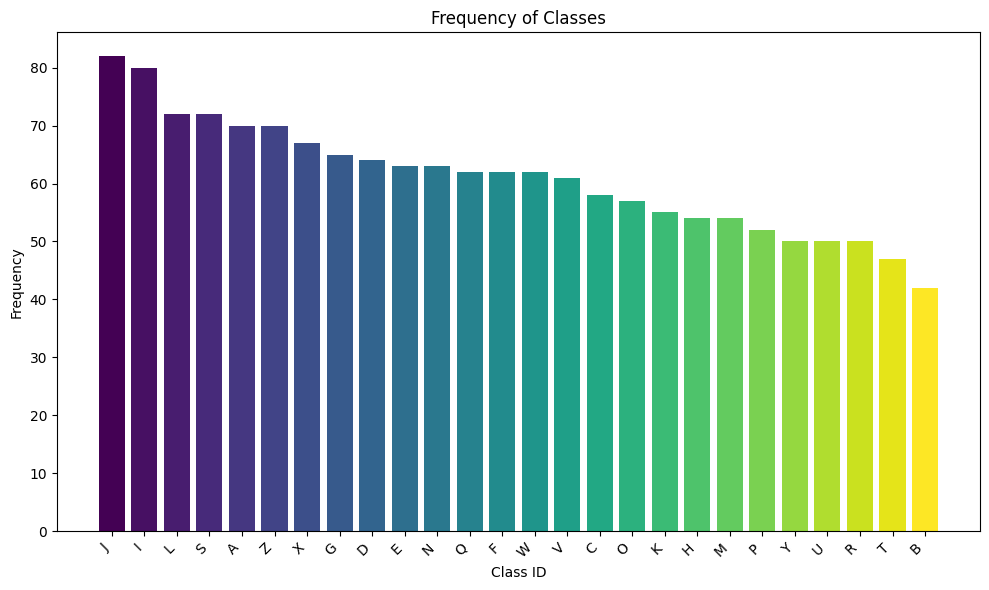

In [13]:
import matplotlib.pyplot as plt

class_frequencies = combined_annotations['class'].value_counts()

# Generate a color for each bar
num_classes = len(class_frequencies)
colors = plt.cm.get_cmap('viridis', num_classes)  # Choose a colormap (e.g., 'viridis')
colors = [colors(i) for i in range(num_classes)]  # Get individual colors

# Create the bar graph with different colors
plt.figure(figsize=(10, 6))
plt.bar(class_frequencies.index, class_frequencies.values, color=colors)
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title('Frequency of Classes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


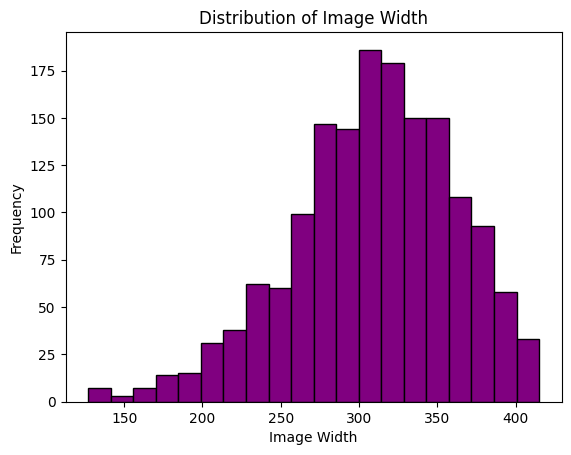

In [26]:
plt.hist(combined_annotations['xmax'], bins=20, edgecolor='black', color = 'purple')
plt.xlabel('Image Width')
plt.ylabel('Frequency')
plt.title('Distribution of Image Width')
plt.show()

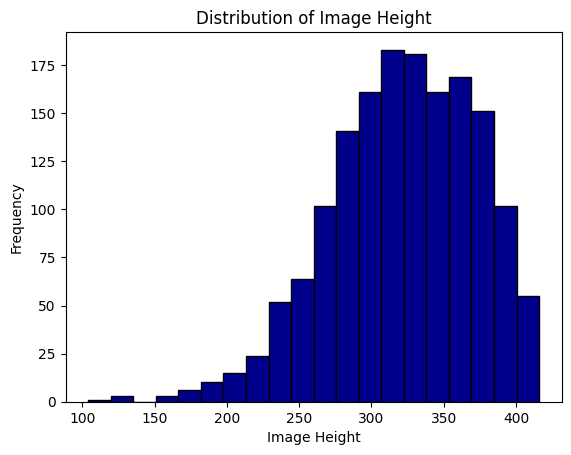

In [28]:
plt.hist(combined_annotations['ymax'], bins=20, edgecolor='black', color = 'darkblue')
plt.xlabel('Image Height')
plt.ylabel('Frequency')
plt.title('Distribution of Image Height')
plt.show()